In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import interpolate

sns.set_style("whitegrid")

In [2]:
def label_to_title(label):
    tmp = label.split("_")
    ans = ""
    for i in range(len(tmp)):
        tmp_ = tmp[i].title()
        ans += tmp_ + " "
    return ans[:-1]
    
label_to_title("average_score")

'Average Score'

In [4]:
def plot_results(dir_name_list, label_list, key_list, title=None, max_step=1000000, n_exp=5, fontsize=28, ticksize=20, max_index=None, yscale="linear", xscale="linear", interpolate=False, filename=None):
    
    key_list.append("total_steps")
    
    # loading dataframe
    stats = {}
    for dir_name in dir_name_list:
        
        stats[dir_name] = {}
        for key in key_list:
            stats[dir_name][key] = []

        for subdir, _, _ in os.walk(dir_name):
            
            for file in os.listdir(subdir):
                
                if not file.endswith('log.pkl'):
                    continue

                df = pd.read_pickle(subdir + "/" + file)
                for key in np.unique(key_list):
                    try:
                        tmp = df[key].tolist()
                        stats[dir_name][key].append(tmp)
                    except:
                        pass
                
    # print(stats)
    n = len(key_list)
        
    """
    Display the graph of the corresponding measure
    """"gnuplot"
    
    sns.set_palette("Set2", len(dir_name_list)) 
    plt.figure(figsize=(15, 8))
    plt.title(title, fontsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    plt.tick_params(axis='both', which='minor', labelsize=ticksize)
    
    plt.xlabel("Number of steps (in millions)", fontsize=fontsize)
    plt.ylabel("Score", fontsize=fontsize)
    plt.yscale(yscale)
    plt.xscale(xscale)
    
    cpt_ = 0
    for dir_name in dir_name_list:
        
        if interpolate:
            
            absc = np.array(stats[dir_name]["total_steps"])
            score = np.array(stats[dir_name][key_list[cpt_]])
            data = [(x, y) for x, y in zip(absc, score)]
            
            # This is the minimum and maximum from all the datapoints.
            xmin = 0
            xmax = max_step

            #100 points evenly spaced along the x axis
            x_points = np.linspace(xmin, xmax)
            #interpolate your values to the evenly spaced points.
            interpolated = [np.interp(x_points, d[0], d[1]) for d in data]

            #Now do the averaging.
            mean = [np.mean(x) for x in zip(*interpolated)]
            median = [np.median(x) for x in zip(*interpolated)]
            std = [np.std(x) for x in zip(*interpolated)]

            plt.plot(x_points / 1000000, mean, label=label_list[cpt_], linewidth=2.0, color=sns.color_palette()[cpt_])
            plt.fill_between(x_points / 1000000, mean-std/np.sqrt(n_exp), mean+std/np.sqrt(n_exp), alpha=0.5)
            plt.plot(x_points / 1000000, median, linestyle='-.', linewidth=2.0, color=sns.color_palette()[cpt_])
            
            print('-------')
            print(mean[-1], std[-1]/np.sqrt(n_exp)/mean[-1]*100, median[-1])
            for s in score:
                print(s[-1])
            
        else:
            
            mean = np.mean(stats[dir_name][key_list[cpt_]], axis=1)
            median = np.median(stats[dir_name][key_list[cpt_]], axis=1)
            std = np.std(stats[dir_name][key_list[cpt_]], axis=1)
            
            plt.plot(stats[dir_name]["total_steps"][0], mean, label=label_list[cpt_], linewidth=2.0, color=sns.color_palette()[cpt_])
            plt.fill_between(stats[dir_name]["total_steps"][0], mean-std/np.sqrt(n_exp), mean+std/np.sqrt(n_exp), alpha=0.2)
            plt.plot(stats[dir_name]["total_steps"][0], median, linestyle='-.', linewidth=2.0, color=sns.color_palette()[cpt_])

        cpt_ += 1

    legend = plt.legend(fontsize=fontsize, framealpha=0, fancybox=True)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(3.0) 

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

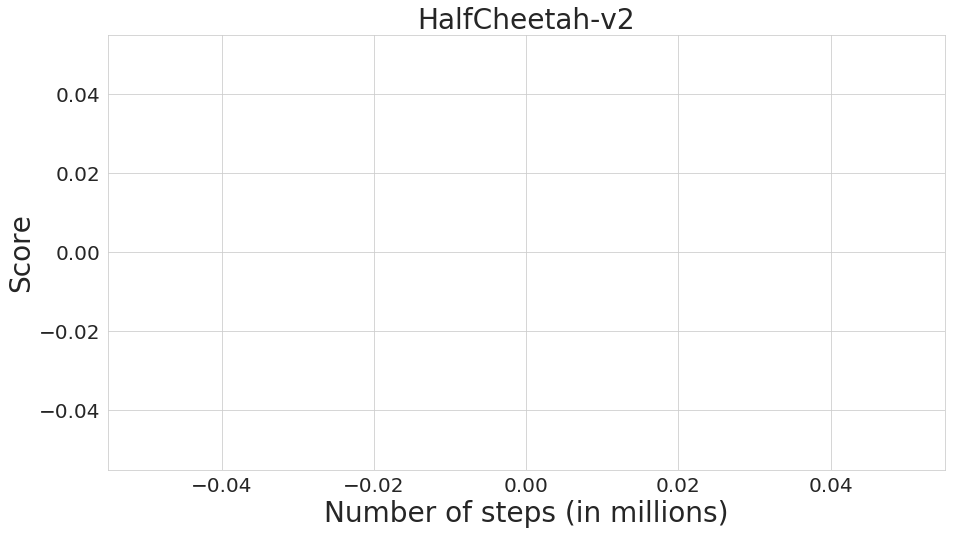

In [5]:
dir_name_list = [
    "1_step_hc/",
    "5_step_hc/",
    "10_step_hc/"
]

label_list = ["CEM-TD3 1", "CEM"]
key_list = ["mu_score", "mu_score"]
plot_results(dir_name_list, label_list, key_list, filename="hard_hc", max_step=2000000, n_exp=10, yscale="linear", interpolate=True, title="HalfCheetah-v2")